In [3]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?


In [2]:
mean = 2
x = [i for i in range(0,10)]

y = [stats.poisson(2).pmf(i) for i in x]


In [3]:
df = pd.DataFrame(y)


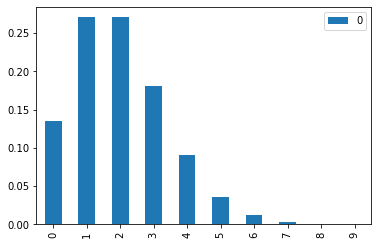

In [4]:
df.plot.bar()

What is the probability that no cars drive up in the noon hour?

In [5]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [6]:
stats.poisson(2).sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?

In [7]:
stats.poisson(2).sf(0)

0.8646647167633873

In [8]:
n_cars = np.random.poisson(2,10000)

In [9]:
n_cars = pd.DataFrame(n_cars)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22526990>]],
      dtype=object)

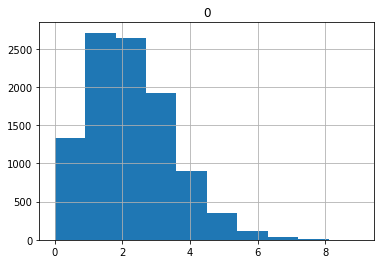

In [10]:
n_cars.hist()


What is the probability that no cars drive up in the noon hour

In [11]:
(n_cars[0]==0).mean()

0.1326

What is the probability that 3 or more cars come through the drive through?

In [12]:
(n_cars[0] >=3).mean()

0.3325

How likely is it that the drive through gets at least 1 car?

In [13]:
(n_cars[0]>=1).mean()

0.8674

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3.

Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.

Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
scholarship?

If I have a GPA of 3.5, what percentile am I in?


In [102]:
grades = stats.norm(3.0, 0.3)

(array([4.000e+00, 1.000e+01, 1.400e+01, 3.500e+01, 5.800e+01, 1.450e+02,
        2.280e+02, 3.170e+02, 5.260e+02, 6.150e+02, 8.340e+02, 9.680e+02,
        1.067e+03, 1.044e+03, 1.018e+03, 8.870e+02, 7.200e+02, 5.430e+02,
        4.070e+02, 2.540e+02, 1.400e+02, 8.100e+01, 4.400e+01, 2.100e+01,
        9.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.92846183, 2.00959285, 2.09072387, 2.17185489, 2.25298591,
        2.33411693, 2.41524795, 2.49637897, 2.57750999, 2.65864101,
        2.73977203, 2.82090305, 2.90203407, 2.98316509, 3.06429611,
        3.14542713, 3.22655815, 3.30768917, 3.38882019, 3.46995121,
        3.55108223, 3.63221325, 3.71334428, 3.7944753 , 3.87560632,
        3.95673734, 4.03786836, 4.11899938, 4.2001304 , 4.28126142,
        4.36239244]),
 <a list of 30 Patch objects>)

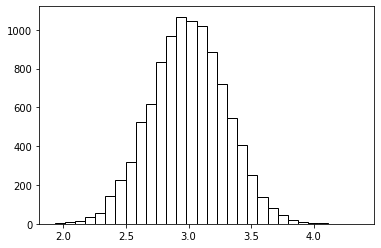

In [117]:
plt.hist(grades.rvs(10_000), bins=30, fc='white', ec='black')

What grade point average is required to be in the top 5% of the graduating class?

In [103]:
grades.isf(0.05)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?

In [104]:
grades.ppf(0.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.

In [105]:
grades.ppf(0.30)

2.842679846187588

Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [106]:
grades.ppf(0.3)

2.842679846187588

In [146]:
grades.ppf(0.00001)
# yes, the 2.8 grade point average will qualify for this schlorship

1.7205327618231527

If I have a GPA of 3.5, what percentile am I in?


In [108]:
grades.cdf(3.5)

0.9522096477271853

Solving exercise #2 with Simulation

In [129]:
grades1 = np.random.normal(3.0, 0.3, size=(100000))                          

In [130]:
grades1 = pd.DataFrame(grades1)


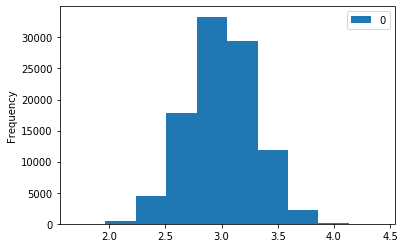

In [131]:
grades1.plot.hist()

What grade point average is required to be in the top 5% of the graduating class?

In [132]:
grades1 = grades1.sort_values(by = [0], ascending = False).reset_index()


In [133]:
grades1.loc[5000:5000]

,index,0
5000,21711,3.495815


What GPA constitutes the bottom 15% of the class?

In [135]:
bottom_15 = 100000*0.85
bottom_15

85000.0

In [136]:
grades1.loc[85000:85000]

,index,0
85000,58291,2.691097


An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.

In [139]:
grades1.loc[70000:70000]

,index,0
70000,55480,2.845679


Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [141]:
grades1.loc[99999:99999]

,index,0
99999,56824,1.695114


If I have a GPA of 3.5, what percentile am I in?


In [162]:
grades1[grades1[0].apply(np.isclose, b=3.5, atol=0.00001)].index.values

#grades1.loc[grades1.isin([search]).any(axis=1)].index.tolist()

array([4842])

In [164]:
percentile_rank = (100000-4842)/1000000
percentile_rank

0.095158

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [5]:
stats.poisson(2).sf(2.2422)

0.32332358381693654

solve with simulation

In [22]:
clicks = np.random.poisson(2, 100000)
clicks

array([0, 1, 1, ..., 2, 1, 2])

In [23]:
clicks = pd.DataFrame(clicks)

In [25]:
likelyhood = clicks[clicks[0]>2.2422].count()/100000
likelyhood

0    0.32313
dtype: float64

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [52]:
p_incorrect = 99/100
n = 60

stats.binom(n,p_incorrect).pmf(60)


0.5471566423907612

Probability that atleast 1 is correct

In [53]:
p1_correct = 1 - stats.binom(n,p_incorrect).pmf(60)
p1_correct

0.4528433576092388

In [44]:
hw = np.random.binomial(n,p_incorrect, size = 10000)

In [45]:
hw = pd.DataFrame(hw)

In [46]:
hw

,0
0,58
1,60
2,60
3,58
4,60
...,...
9995,60
9996,60
9997,60
9998,60


In [47]:
hw[hw[0]==60].count()

0    5400
dtype: int64

In [48]:
prob_60 = hw[hw[0]==60].count()/10000
prob_60

0    0.54
dtype: float64

In [49]:
# probability that atleast 1 is correct is:
p_1_correct = 1 - prob_60
p_1_correct

0    0.46
dtype: float64

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [63]:
p_clean = 0.03 
n = 66 * 0.9

In [71]:
stats.binom(num,p_clean,).pmf(0)

0.16377251387711278

In [69]:
#Probability of getting cleaned up each day 
p_everyday = 1 - stats.binom(num,p_clean,).pmf(0)
p_everyday

0.8362274861228872

How likely is it that it goes two days without getting cleaned up?

In [136]:
stats.binom(num,p_clean).pmf(0) * stats.binom(num,p_clean).pmf(0)

0.026821436301629097

How likely is it that it goes without getting cleaned up all week?

In [349]:
stats.binom(num,p_clean).pmf(0)**5

0.00011781621791055168

Solve using simulation

In [304]:
clean = np.random.binomial(n,p, size =10000)

In [305]:
clean = pd.DataFrame(p_s_clean)

Probability of getting cleaned up each day 

In [306]:
clean[clean[0] >0].count()/10000

0    0.8407
dtype: float64

How likely is it that it goes two days without getting cleaned up?

In [315]:
clean = clean.rename(columns={0: 'day1'})
clean

,day1
0,4
1,1
2,1
3,1
4,1
...,...
9995,2
9996,3
9997,5
9998,1


In [318]:
clean[clean['day1'] == 0].count()

day1    1593
dtype: int64

In [321]:
clean['day2'] = clean['day1'].shift(-1)

In [275]:
p_s_clean

,0,count
0,4,3.0
1,3,2.0
2,2,4.0
3,4,3.0
4,3,3.0
...,...,...
9995,0,4.0
9996,4,2.0
9997,2,0.0
9998,0,2.0


In [322]:
#set NaN value to a float
clean.iat[9999, 1] = 3.0

In [324]:
#convert 'day2' columns from float to int
clean['day2'] = clean['day2'].astype(int)

In [328]:
# new columns "match" which is true if previous columns are both zero
clean['match'] = clean.apply(lambda x: True if x['day1'] == 0 and x['day2'] == 0 else False, axis =1)

In [329]:
clean

,day1,day2,match
0,4,1,False
1,1,1,False
2,1,1,False
3,1,1,False
4,1,3,False
...,...,...,...
9995,2,3,False
9996,3,5,False
9997,5,1,False
9998,1,1,False


In [330]:
clean.match.mean()

0.0261

How likely is it that it goes without getting cleaned up all week?

In [331]:
clean['day3'] = clean['day1'].shift(-2)
clean['day4'] = clean['day1'].shift(-3)
clean['day5'] = clean['day1'].shift(-4)
clean

,day1,day2,match,day3,day4,day5
0,4,1,False,1.0,1.0,1.0
1,1,1,False,1.0,1.0,3.0
2,1,1,False,1.0,3.0,1.0
3,1,1,False,3.0,1.0,1.0
4,1,3,False,1.0,1.0,2.0
...,...,...,...,...,...,...
9995,2,3,False,5.0,1.0,1.0
9996,3,5,False,1.0,1.0,NaN
9997,5,1,False,1.0,NaN,NaN
9998,1,1,False,NaN,NaN,NaN


In [339]:
clean = clean.fillna(1)
clean

,day1,day2,day3,day4,day5
0,4,1,1.0,1.0,1.0
1,1,1,1.0,1.0,3.0
2,1,1,1.0,3.0,1.0
3,1,1,3.0,1.0,1.0
4,1,3,1.0,1.0,2.0
...,...,...,...,...,...
9995,2,3,5.0,1.0,1.0
9996,3,5,1.0,1.0,1.0
9997,5,1,1.0,1.0,1.0
9998,1,1,1.0,1.0,1.0


In [337]:
clean = clean.drop(columns=['match'])

In [342]:
#convert 'day' columns from float to int
clean['day3'] = clean['day3'].astype(int)
clean['day4'] = clean['day4'].astype(int)
clean['day5'] = clean['day5'].astype(int)

In [345]:
clean

,day1,day2,day3,day4,day5
0,4,1,1,1,1
1,1,1,1,1,3
2,1,1,1,3,1
3,1,1,3,1,1
4,1,3,1,1,2
...,...,...,...,...,...
9995,2,3,5,1,1
9996,3,5,1,1,1
9997,5,1,1,1,1
9998,1,1,1,1,1


In [346]:
clean['match1'] = clean.apply(lambda x: True if (x['day1'] == 0 and x['day2'] == 0 and x['day3'] == 0 and x['day4'] == 0 and x['day5'] == 0) else False, axis = 1)

In [348]:
clean.match1.mean()

0.0001

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [360]:
stats.norm(15,3).cdf(16.5)

0.6914624612740131

using simulation

In [361]:
line = np.random.normal(15,3, size =100000)

In [362]:
line = pd.DataFrame(line)

In [359]:
line[line[0]<16.5].count()/10000

0    0.7011
dtype: float64

Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [363]:
from env import host, user, password

In [364]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [365]:
employees = pd.read_sql("SELECT* from employees", get_db_url('employees'))

In [371]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [369]:
salary = pd.read_sql("SELECT* from salaries", get_db_url('employees'))

In [372]:
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [383]:
#average salary
avg_salary = salary[salary.to_date.astype('str') == '9999-01-01'].salary.mean()
avg_salary

72012.23585730705

In [382]:
#std dev
std_dev = salary[salary.to_date.astype('str') == '9999-01-01'].salary.std()
std_dev

17309.99538025198

In [395]:
e_salaries = stats.norm(avg_salary,std_dev)
e_salaries

What percent of employees earn less than 60,000?

In [390]:
e_salaries.cdf(60000)

0.24385742480214423

What percent of employees earn more than 95,000?

In [391]:
e_salaries.sf(95000)

0.09208819199804053

What percent of employees earn between 65,000 and 80,000?

In [397]:
e_salaries.cdf(80000) - e_salaries.cdf(65000)

0.3350605685446666

What do the top 5% of employees make?

In [399]:
e_salaries.isf(0.05)

100484.64454102777